In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
house = pd.read_csv('../Excel/Houese prices.csv')
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [4]:
house['date'] = pd.to_datetime(house['date'], format='%Y-%m-%d %H:%M:%S')

In [5]:
house['year'] = pd.DatetimeIndex(house['date']).year
house['month'] = pd.DatetimeIndex(house['date']).month
house['day'] = pd.DatetimeIndex(house['date']).day
house['hour'] = pd.DatetimeIndex(house['date']).hour
house['minutes'] = pd.DatetimeIndex(house['date']).minute
house['seconds'] = pd.DatetimeIndex(house['date']).second

house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,street,city,statezip,country,year,month,day,hour,minutes,seconds
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014,5,2,0,0,0
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,709 W Blaine St,Seattle,WA 98119,USA,2014,5,2,0,0,0
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014,5,2,0,0,0
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,857 170th Pl NE,Bellevue,WA 98008,USA,2014,5,2,0,0,0
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,9105 170th Ave NE,Redmond,WA 98052,USA,2014,5,2,0,0,0


In [6]:
house.drop(axis=1, columns=['year', 'hour', 'minutes', 'seconds', 'date'], inplace=True)
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,month,day
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,5,2
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,5,2
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,5,2
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,5,2
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,5,2


In [7]:
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,month,day
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,5.757609,14.791304
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,0.683851,8.677569
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,5.000000,1.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,5.000000,7.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,6.000000,14.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,6.000000,23.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,7.000000,31.000000


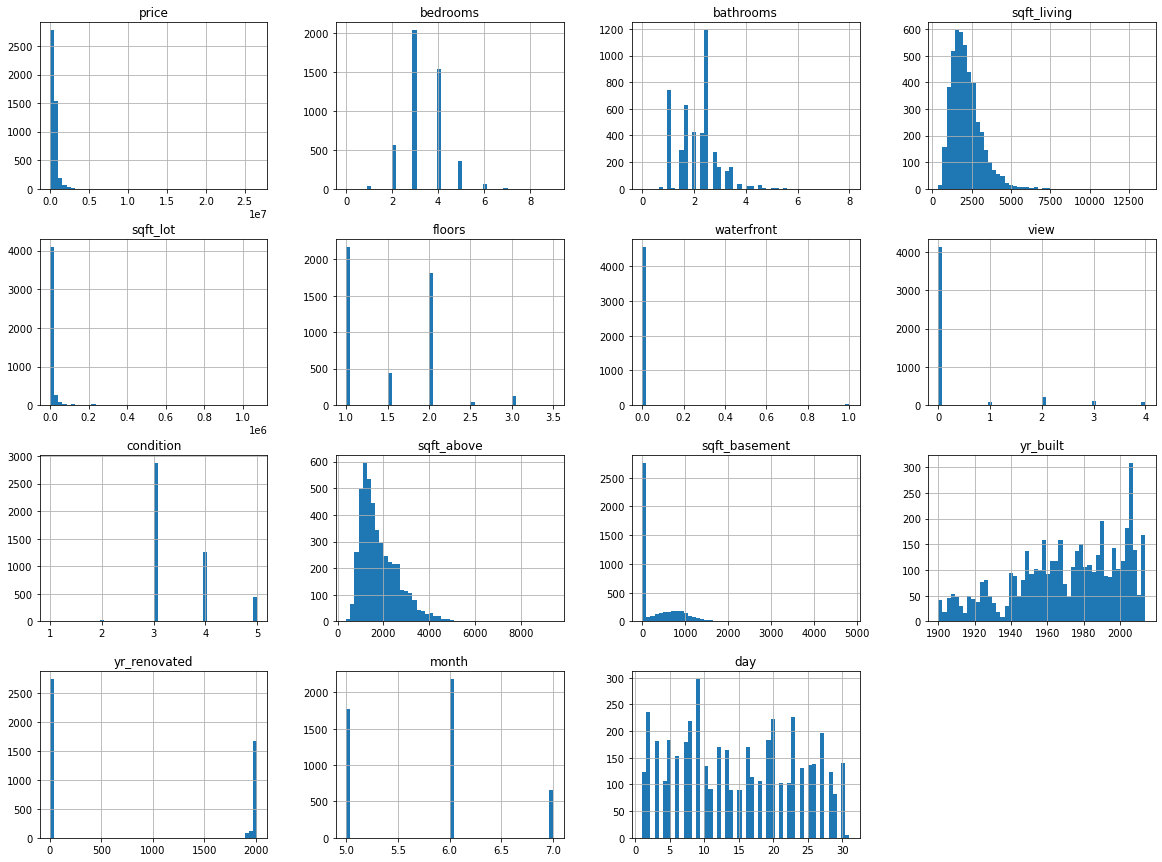

In [8]:
house.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
# We can consider these 0 values as NaN
mean = house['price'].mean()
house.loc[house['price'] == 0, 'price'] = mean


In [10]:
bins = [7.800000e+03, 3.281589e+05, 4.687500e+05, 6.549625e+05, 2.659000e+07]
labels = [0, 1, 2, 3]
house['price_cat'] = pd.cut(house['price'], bins=bins, labels=labels, duplicates='raise', include_lowest=True)
house['price_cat']

0       0
1       3
2       1
3       1
4       2
       ..
4595    0
4596    2
4597    1
4598    0
4599    0
Name: price_cat, Length: 4600, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

<AxesSubplot:>

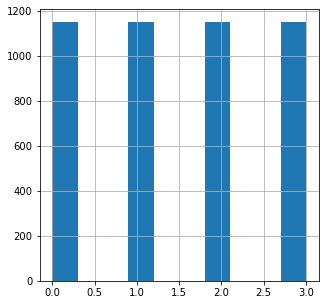

In [11]:
house['price_cat'].hist(figsize=(5,5))

In [12]:
house['price_cat'].value_counts()

0    1150
1    1150
2    1150
3    1150
Name: price_cat, dtype: int64

In [13]:
house['price_cat'].unique()

[0, 3, 1, 2]
Categories (4, int64): [0 < 1 < 2 < 3]

In [14]:
house['price_cat'] = house['price_cat'].astype('int64')

In [15]:
#We can deduce from that that the data is evenly split, so we can use train test split without stratifiedfolds etc..

In [16]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   object 
 14  city           4600 non-null   object 
 15  statezip       4600 non-null   object 
 16  country        4600 non-null   object 
 17  month          4600 non-null   int64  
 18  day     

<AxesSubplot:>

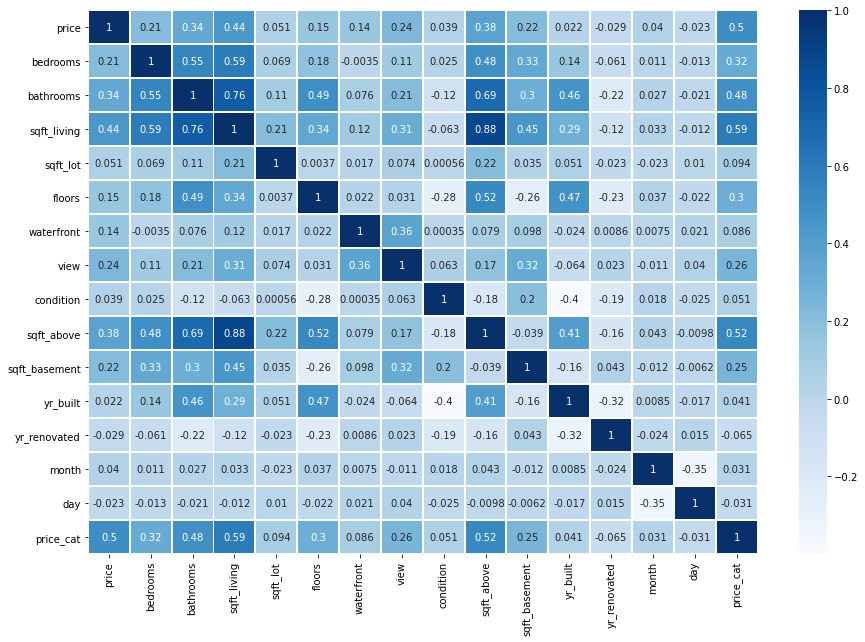

In [17]:
corr = house.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, annot=True, linewidths=1, ax=ax, cmap='Blues')

In [18]:
house.drop(axis=1, columns=['price_cat'], inplace=True)

In [19]:
print(house['country'].nunique(), house['country'].unique())

1 ['USA']


In [20]:
#The country column is useless since it's one country
house.drop(axis=1, columns='country', inplace=True)

In [21]:
house['street'].nunique()

4525

In [22]:
#Alot of values for street and cannot be encoded
house.drop(axis=1, columns='street', inplace=True)

In [23]:
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,month,day
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,WA 98133,5,2
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,WA 98119,5,2
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,WA 98042,5,2
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,WA 98008,5,2
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,WA 98052,5,2


In [24]:
# def get_dummies(data):
#     data = pd.get_dummies(data, columns=['city' ,'statezip'], drop_first=True)
#     return data

# house = get_dummies(house)
#house.drop(axis=1, columns=['city' ,'statezip'], inplace=True)
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [25]:
house['yr_renovated'].unique()

array([2005,    0, 1992, 1994, 2010, 1988, 2009, 1969, 2000, 1979, 1989,
       2014, 1999, 2003, 1983, 1997, 1912, 1923, 1954, 2011, 2001, 2013,
       2006, 1972, 1985, 1998, 2004, 1958, 2008, 1970, 1982, 1986, 1996,
       2002, 1971, 1990, 1956, 1945, 1984, 2012, 1993, 2007, 1981, 1974,
       1963, 1968, 1995, 1934, 1953, 1966, 1955, 1987, 1960, 1978, 1980,
       1948, 1991, 1913, 1977, 1975], dtype=int64)

In [26]:
target = house['price']
house.drop(axis=1, columns=['price'], inplace=True)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(house, target, test_size=0.2, random_state=42)

In [57]:
X_train['statezip'].dtype

dtype('O')

In [58]:
features = [col for col in X_train.columns if X_train[col].dtype in [np.float64, np.int64]]
features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'month',
 'day']

In [59]:
cat_col = [col for col in X_train.columns if X_train[col].dtype not in [np.float64, np.int64]]
cat_col

['city', 'statezip']

In [60]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

oe = OrdinalEncoder(handle_unknown='coerce')
sc = StandardScaler()

In [65]:
def get_stats_per_row(data):
    data['zero_row'] = (data == 0).astype(int).sum(axis=1)
    data['min_row'] = data.min(axis=1)
    data['max_row'] = data.max(axis=1)
    data['std_row'] = data.std(axis=1)
    data['mean_row'] = data.mean(axis=1)
    
    return data

X_train = get_stats_per_row(X_train)
X_test = get_stats_per_row(X_test)

In [66]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,yr_renovated,city,statezip,month,day,zero_row,min_row,max_row,std_row,mean_row
1898,4.0,2.50,2770,45514,2.0,0,0,4,2770,0,...,0,41.0,44.0,6,4,5,0.0,45514.0,13677.221682,5650.277839
1370,4.0,3.00,3720,29043,2.0,0,0,3,3720,0,...,0,18.0,21.0,5,27,5,0.0,29043.0,8694.897661,3837.257169
3038,4.0,2.50,2810,11120,2.0,0,0,3,2810,0,...,0,32.0,42.0,6,23,5,0.0,11120.0,3346.230806,1674.833365
2361,4.0,3.75,4030,10800,2.0,0,0,3,4030,0,...,0,18.0,21.0,6,12,5,0.0,10800.0,3319.940692,1763.020686
156,3.0,2.00,2000,7000,2.0,0,0,3,2000,0,...,1986,34.0,63.0,5,6,4,0.0,7000.0,2113.814113,1213.534632


In [62]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [77]:
models = {
    "LR": LinearRegression(),
    "KNNR" : KNeighborsRegressor(), 
    "SVR": SVR(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(),
    "XGBR": XGBRegressor(),
    "CATB": CatBoostRegressor(silent=True),
    "LGBM": LGBMRegressor(),
}

In [78]:
X_train[cat_col] = oe.fit_transform(X_train[cat_col])
X_test[cat_col] = oe.transform(X_test[cat_col])

features.extend(cat_col)
features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'month',
 'day',
 'city',
 'statezip',
 'mean_row',
 'std_row',
 'max_row',
 'min_row',
 'zero_row',
 'mean_row',
 'std_row',
 'max_row',
 'min_row',
 'zero_row',
 'city',
 'statezip']

In [79]:
features+=['mean_row', 'std_row', 'max_row', 'min_row', 'zero_row']

In [80]:
X_train[features] = sc.fit_transform(X_train[features])
X_test[features] = sc.transform(X_test[features])

In [81]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,yr_renovated,city,statezip,month,day,zero_row,min_row,max_row,std_row,mean_row
1898,0.670520,0.436902,0.660971,0.870054,0.910403,-0.085972,-0.306194,0.808830,1.105179,-0.679582,...,-0.822446,1.382231,0.246151,0.344194,-1.246422,1.065772,0.0,0.869287,0.860991,0.870711
1370,0.670520,1.074918,1.652011,0.406802,0.910403,-0.085972,-0.306194,-0.672013,2.211185,-0.679582,...,-0.822446,-0.602266,-0.850847,-1.118432,1.397683,1.065772,0.0,0.405844,0.397162,0.432188
3038,0.670520,0.436902,0.702699,-0.097288,0.910403,-0.085972,-0.306194,-0.672013,1.151748,-0.679582,...,-0.822446,0.605689,0.150759,0.344194,0.937839,1.065772,0.0,-0.098454,-0.100771,-0.090848
2361,0.670520,2.031941,1.975402,-0.106289,0.910403,-0.085972,-0.306194,-0.672013,2.572092,-0.679582,...,-0.822446,-0.602266,-0.850847,0.344194,-0.326733,1.065772,0.0,-0.107457,-0.103219,-0.069518
156,-0.430066,-0.201114,-0.142292,-0.213165,0.910403,-0.085972,-0.306194,-0.672013,0.208732,-0.679582,...,1.206786,0.778254,1.152366,-1.118432,-1.016500,-0.121286,0.0,-0.214378,-0.215503,-0.202424


In [82]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Training Score: {model.score(X_train, y_train)}')
    print(f'Test Score: {model.score(X_test, y_test)}')  
    print(f'MSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')  
    print('-'*30)

Using model: LR
Training Score: 0.5904144586845705
Test Score: 0.03741472265145318
MSE: 989189.7093318292
------------------------------
Using model: KNNR
Training Score: 0.6729411476202958
Test Score: 0.032698419782183685
MSE: 991610.075484465
------------------------------
Using model: SVR
Training Score: -0.046706088564977044
Test Score: -0.01315527865679833
MSE: 1014840.9612273573
------------------------------
Using model: DT
Training Score: 1.0
Test Score: 0.01941258946781199
MSE: 998396.7045036167
------------------------------
Using model: RF
Training Score: 0.9528586454150729
Test Score: 0.043368284401936186
MSE: 986125.9099149503
------------------------------
Using model: XGBR
Training Score: 0.9874374166988937
Test Score: 0.0570058066392134
MSE: 979071.6864703039
------------------------------
Using model: CATB
Training Score: 0.94888268173763
Test Score: 0.06143174563977749
MSE: 976771.3498648421
------------------------------
Using model: LGBM
Training Score: 0.8682069398

# For big tabular data, LGBM beats XGB.
## To tune hyperparameters, we can use gridsearch, randomized, or something better like Optuna trials